#### Loading Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, confusion_matrix, classification_report, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from lazypredict.Supervised import LazyClassifier
from tabulate import tabulate
import itertools
%matplotlib inline

#### Loading Data from CSV File

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


Count data in each class

In [3]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### Visualize the data set

<Axes: xlabel='Class', ylabel='count'>

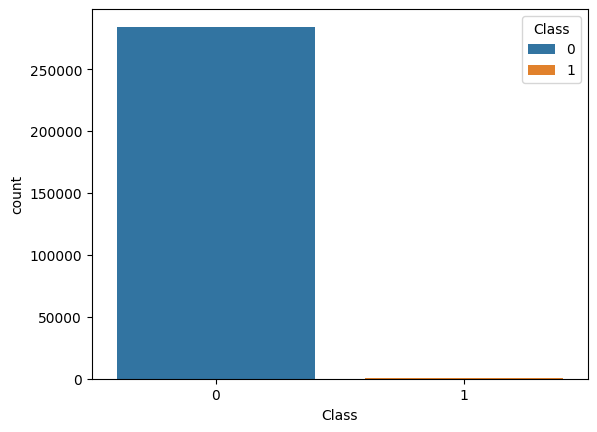

In [4]:
#univariate visual analysis
sns.countplot(data=df,x=df['Class'],hue='Class')

Correlation Matrix

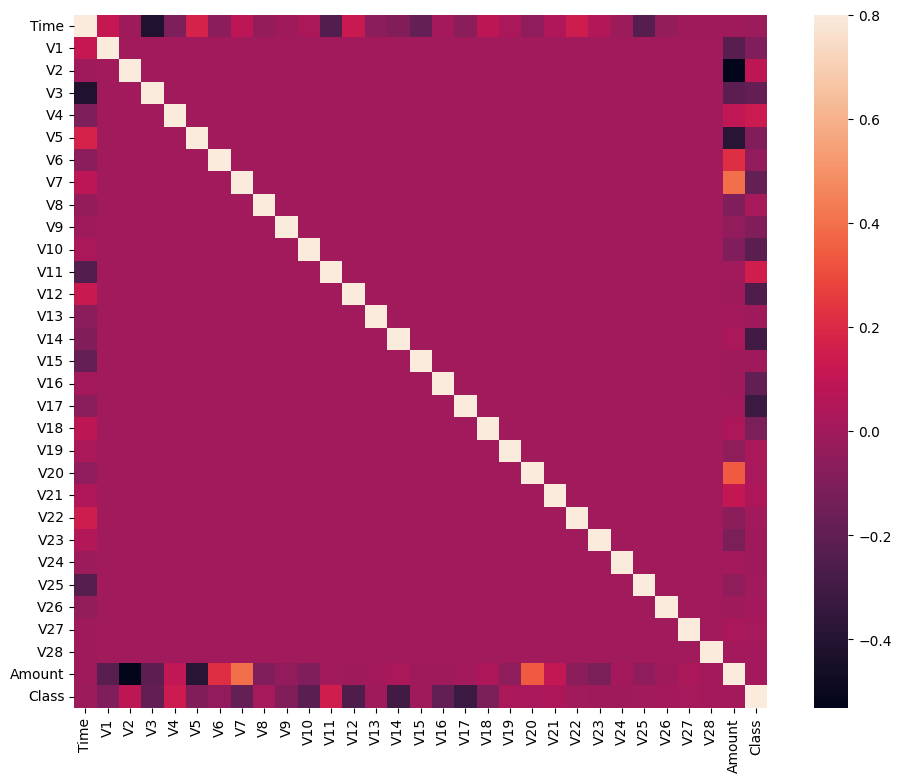

In [5]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Plot function for confusion matrix

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Data pre-processing and selection

In [7]:
X = np.asanyarray(df.drop(columns='Class'))
y = np.asanyarray(df['Class'])

Normalize the dataset

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X)

### Split the dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=42)

### Logistic Regression

Training the model

In [10]:
LR = LogisticRegression(C=.1, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.1, solver='liblinear')

Predicting the value

In [11]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, ..., 0, 0, 0])

Evaluating the model

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.56      0.68        98

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix, without normalization


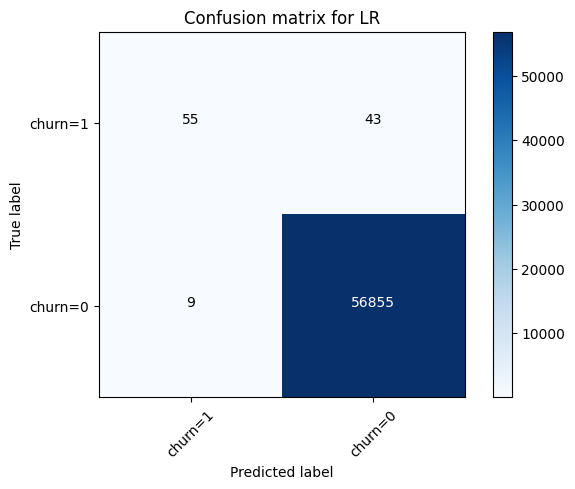

In [12]:
LR_accuracy_score = accuracy_score(y_test, yhat)
LR_jaccard_index = jaccard_score(y_test, yhat)
LR_f1_score = f1_score(y_test, yhat)
LR_confusion_matrix = confusion_matrix(y_test, yhat, labels=[1,0])

print("Classification Report for Logistic Regression")
print(classification_report(y_test, yhat))

np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(LR_confusion_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix for LR')


### KNN Classifier

Training the model

In [13]:
KNN = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
KNN

KNeighborsClassifier(n_neighbors=4)

Predicting using the model

In [14]:
yhat = KNN.predict(X_test)
yhat

array([1, 0, 0, ..., 0, 0, 0])

Evaluating the model

Classification Report for KNN Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix, without normalization


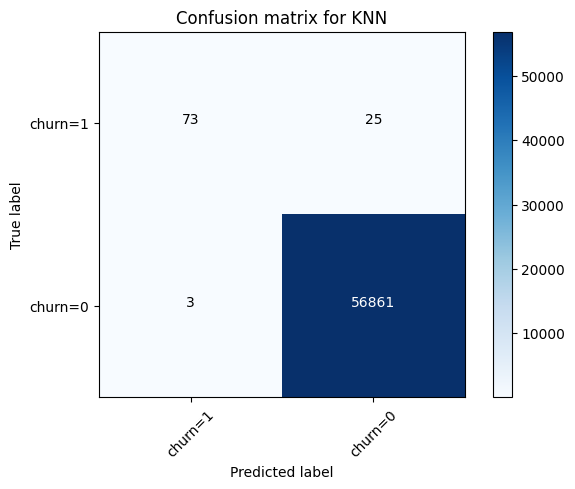

In [15]:
KNN_accuracy_score = accuracy_score(y_test, yhat)
KNN_jaccard_index = jaccard_score(y_test, yhat)
KNN_f1_score = f1_score(y_test, yhat)
KNN_confusion_matrix = confusion_matrix(y_test, yhat, labels=[1,0])

# print("Jaccard Index of KNN Classifier: ", KNN_jaccard_index)
# print("F1 Score of KNN Classifier: ", KNN_f1_score)
print("Classification Report for KNN Classifier")
print(classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(KNN_confusion_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix for KNN')


### Decision Tree

Training the model

In [16]:
Tree = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
Tree

DecisionTreeClassifier(criterion='entropy')

Predicting using the model

In [17]:
yhat = Tree.predict(X_test)
yhat

array([1, 0, 0, ..., 0, 0, 0])

Evaluating the model

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.78      0.78        98

    accuracy                           1.00     56962
   macro avg       0.89      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix, without normalization


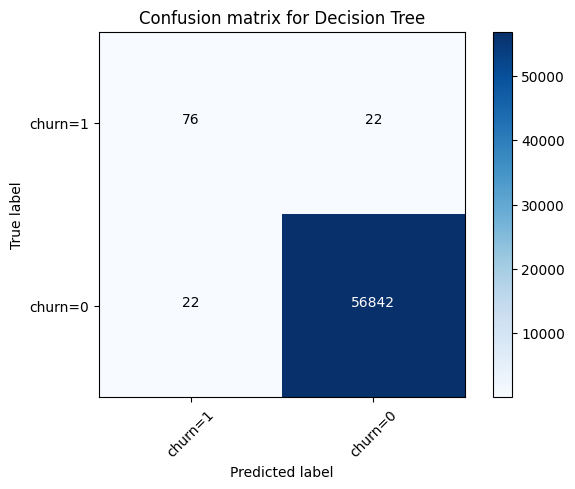

In [18]:
Tree_accuracy_score = accuracy_score(y_test, yhat)
Tree_jaccard_index = jaccard_score(y_test, yhat)
Tree_f1_score = f1_score(y_test, yhat)
Tree_confusion_matrix = confusion_matrix(y_test, yhat, labels=[1,0])

print("Classification Report for Decision Tree")
print(classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(Tree_confusion_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix for Decision Tree')


### Support Vector Machine

Training the model

In [19]:
SVM = svm.SVC(kernel='rbf').fit(X_train, y_train)
SVM

SVC()

Predicting using the model

In [20]:
yhat = SVM.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

Evaluating the model

Classification Report for SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix, without normalization


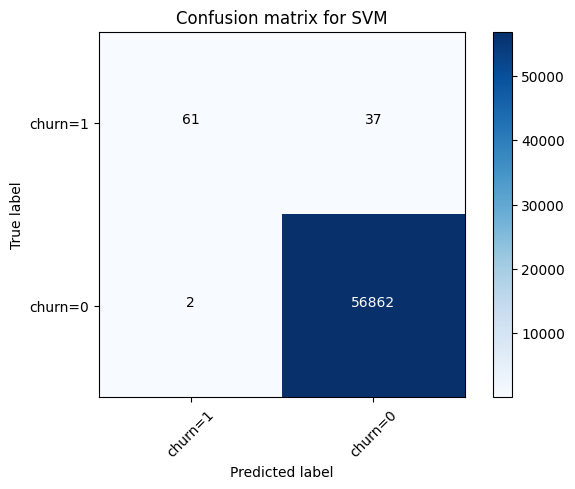

In [21]:
SVM_accuracy_score = accuracy_score(y_test, yhat)
SVM_jaccard_index = jaccard_score(y_test, yhat)
SVM_f1_score = f1_score(y_test, yhat)
SVM_confusion_matrix = confusion_matrix(y_test, yhat, labels=[1,0])

print("Classification Report for SVM")
print(classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(SVM_confusion_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix for SVM')


#### Evaluation of all the Models

In [22]:
d = {'KNN':[KNN_accuracy_score,KNN_jaccard_index,KNN_f1_score],
     'Tree':[Tree_accuracy_score, Tree_jaccard_index, Tree_f1_score],
     'LR':[LR_accuracy_score, LR_jaccard_index, LR_f1_score],
     'SVM':[SVM_accuracy_score, SVM_jaccard_index, SVM_f1_score]}
Report = pd.DataFrame(data=d, index = ['Accuracy','Jaccard Index','F1-Score'])

print(tabulate(Report, headers = 'keys', tablefmt = 'psql')) 

+---------------+----------+----------+----------+----------+
|               |      KNN |     Tree |       LR |      SVM |
|---------------+----------+----------+----------+----------|
| Accuracy      | 0.999508 | 0.999228 | 0.999087 | 0.999315 |
| Jaccard Index | 0.722772 | 0.633333 | 0.514019 | 0.61     |
| F1-Score      | 0.83908  | 0.77551  | 0.679012 | 0.757764 |
+---------------+----------+----------+----------+----------+


KNN shows the best results, let's try to find the k-value for best results

### KNN with different values of K

In [23]:
Ks = 15
Accuracy_Score = np.zeros((Ks-1))
Jaccard_Index = np.zeros((Ks-1))
F1_Score = np.zeros((Ks-1))
Precision = np.zeros((Ks-1))
Recall = np.zeros((Ks-1))


for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    Accuracy_Score[n-1] = accuracy_score(y_test, yhat)
    Jaccard_Index[n-1] = jaccard_score(y_test, yhat)
    F1_Score[n-1] = f1_score(y_test, yhat)
    Precision[n-1] = precision_score(y_test, yhat)
    Recall[n-1] = recall_score(y_test, yhat)



Plotting the metrics to find best value

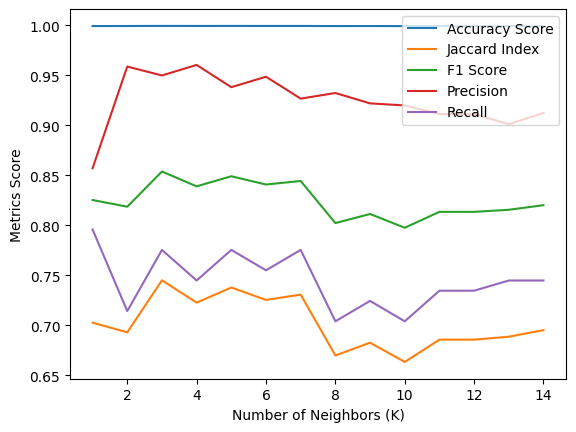

In [24]:
plt.plot(range(1,Ks),Accuracy_Score, label="Accuracy Score")
plt.plot(range(1,Ks),Jaccard_Index, label="Jaccard Index")
plt.plot(range(1,Ks),F1_Score, label="F1 Score")
plt.plot(range(1,Ks),Precision, label="Precision")
plt.plot(range(1,Ks),Recall, label="Recall")

plt.ylabel('Metrics Score')
plt.xlabel('Number of Neighbors (K)')
plt.legend(loc='upper right')
plt.show()

We can observe from the graph that metrics are optimum value at k = 7.